# YouTube API DEMO with Python

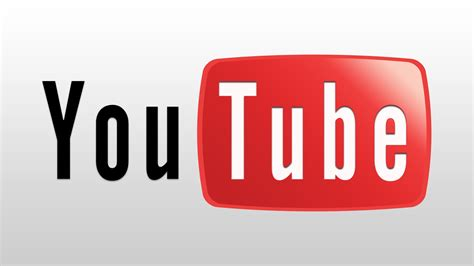

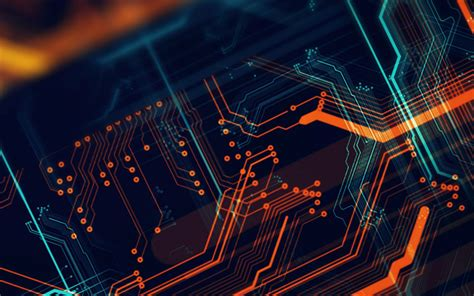
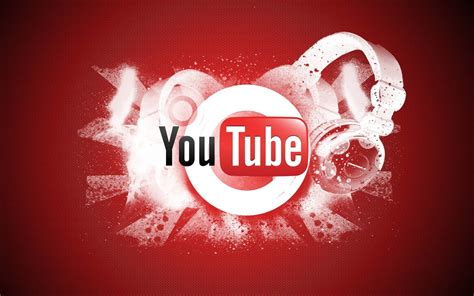

By Hakeem Lawrence

# Import Modules

In [14]:
from googleapiclient.discovery import build
import pandas as pd, requests, youTubeCredentials
from IPython.display import JSON

In [15]:
# store youtube build variables

api_key = youTubeCredentials.youTubeApi
api_service_name = "youtube"
api_version = "v3"

# youtube api client function

youtube = build(api_service_name, api_version, developerKey=api_key)

In [16]:
# get list of playlists

channelid = 'UCmBA_wu8xGg1OfOkfW13Q0Q'

playlists_request = youtube.playlists().list(
    part = 'snippet, contentDetails',
    channelId = channelid,
    maxResults = 25
)


playlists_response = playlists_request.execute()

playlist_ids = [item['id'] for item in playlists_response['items']]

for id in playlist_ids[:5]:
    print(id)

PLRW7iEDD9RDStpKHAckdbGs3xaCChAL7Z
PLRW7iEDD9RDSnH37AtspYPFs9OmfSWlwZ
PLRW7iEDD9RDRm3yjwHu_l0AZwCjTOQyP_
PLRW7iEDD9RDTXZxJpPAVeXLq3-tDF2VDx
PLRW7iEDD9RDTiSZxlUlwpFPSk8ppSGNmt


In [17]:
# get list of videos in playlist


playlist_video_request = youtube.playlistItems().list(
    part = 'contentDetails, id, snippet',
    playlistId = 'PLRW7iEDD9RDStpKHAckdbGs3xaCChAL7Z',
    maxResults = 25
)


playlist_video_response = playlist_video_request.execute()

video_ids = [item['contentDetails']['videoId'] for item in playlist_video_response['items']]

for id in video_ids[:5]:
    print(id)

wAjHQXrIj9o
1TCX_Aqzoo4
ARWg160eaX4
saGYMhApaH8
Cr8K88UcO0s


In [18]:
# get video statistics

bad_bunny_data = []

for item in video_ids:
    vd_request = youtube.videos().list(
        part = 'snippet, contentDetails, statistics',
        id = item
    )


    video_response = vd_request.execute()

    for video in video_response['items']:
        bad_bunny_data.append(video['statistics'])



pd.DataFrame(bad_bunny_data)        

,viewCount,likeCount,favoriteCount,commentCount
0,107730695,921004,0,24715
1,14104238,667667,0,28338
2,226219136,2369736,0,85013
3,737855450,4070348,0,74137
4,741749076,4991653,0,112577
5,426754229,3258249,0,66510
6,112676590,1117816,0,18186
7,223318810,1932392,0,17581
8,112371287,1248225,0,14995
9,89780618,770037,0,6937


In [19]:
2100%4

0

In [20]:
2100%100

0

In [21]:
2100%400

100